# Agenda
##### 1) Salary Distribution || Done
##### 2) Mean Salary across Experience Levels || Done
##### 3) Salary distribution across Experience Levels through violin plot || Done
##### 4) Salary and Mean salary distribution across employment type || Done
##### 5) Fetching the outliers in all the employment types || Done
##### 6) Fetching the outliers in all the Job title fields || Done
##### 7) Salary distribution in different Company sizes || Done
##### 8) Salary outliers in different compny sizes || Done
##### 9) Salary distribution of job Type || Done
##### 10) Mean Salary Vs Job type || Done
##### 11) Sum of salaries in the job types(violin) || Done
##### 12) Salary distribution of Job type and Company size || Done
##### 13) Job type distribution || Done
##### 14) Experience Level distribution || Done
##### 15) Top 10 data science roles according to the mean salary
##### 16) Top 10 data science roles with highest opening
##### 17) Top 10 countries according to the mean salary
##### 18) Top 10 countries having most Data science opportunities
##### 19) Top 10 employee residence according to the mean salaries 
##### 20) Top 10 countris having most data scientists
##### 21) Company size and Job type

In [1]:
# Lets import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

In [2]:
#loading the data
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.shape

(3755, 11)

In [5]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [6]:
# Lets check for the null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [8]:
#Dataset statistics
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


#### Observation

##### We have checked that all the columns are in correct data types and there's no missing values as well. However, we need to to transform some of the data for better understanding


#### Data Transformation

In [9]:
# Lets delete the columns which we don't require in our analysis

In [10]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [11]:
# Since we already have salary details in USD. We can delete the salary columns and its associated salary currency
df.drop(columns=['salary','salary_currency'],inplace=True)

In [12]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [13]:
# lets transform the experience_level column in easy to understand
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [14]:
# Giving the abriviations thier full name
df['experience_level'] = df['experience_level'].map({'SE':'Senior Level',
                                                     'MI':'Mid Level',
                                                     'EN':'Entry Level',
                                                     'EX': 'Executive Level'})

df['employment_type'] = df['employment_type'].map({'FT':'Full-Time',
                                                   'CT': 'Contract',
                                                   'FL':'Freelancer',
                                                   'PT':'Part-Time'})

df['company_size'] = df['company_size'].map({'L':'Large',
                                             'S':'Small',
                                             'M':'Midium'})

df['remote_ratio'] = df['remote_ratio'].map({100:'On-Site',
                                             50:'Hybrid',
                                             0:'Remote'})

# Renaming the salary_in_usd to just salary
df.rename(columns={'salary_in_usd':'salary'},inplace=True)

In [15]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level,Full-Time,Principal Data Scientist,85847,ES,On-Site,ES,Large
1,2023,Mid Level,Contract,ML Engineer,30000,US,On-Site,US,Small
2,2023,Mid Level,Contract,ML Engineer,25500,US,On-Site,US,Small
3,2023,Senior Level,Full-Time,Data Scientist,175000,CA,On-Site,CA,Midium
4,2023,Senior Level,Full-Time,Data Scientist,120000,CA,On-Site,CA,Midium


In [16]:
# Lets change the locations abriviations to thier full name
!pip install country_converter
import country_converter
cc = country_converter.CountryConverter()
df['company_location'] = cc.convert(df['company_location'], to='name_short')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.2 MB/s eta 0:00:00


In [17]:
df['employee_residence'] = cc.convert(df['employee_residence'], to='name_short')

In [18]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level,Full-Time,Principal Data Scientist,85847,Spain,On-Site,Spain,Large
1,2023,Mid Level,Contract,ML Engineer,30000,United States,On-Site,United States,Small
2,2023,Mid Level,Contract,ML Engineer,25500,United States,On-Site,United States,Small
3,2023,Senior Level,Full-Time,Data Scientist,175000,Canada,On-Site,Canada,Midium
4,2023,Senior Level,Full-Time,Data Scientist,120000,Canada,On-Site,Canada,Midium


# Data Analysis
Now let's draw the insights from the data

#### Salary Distribution

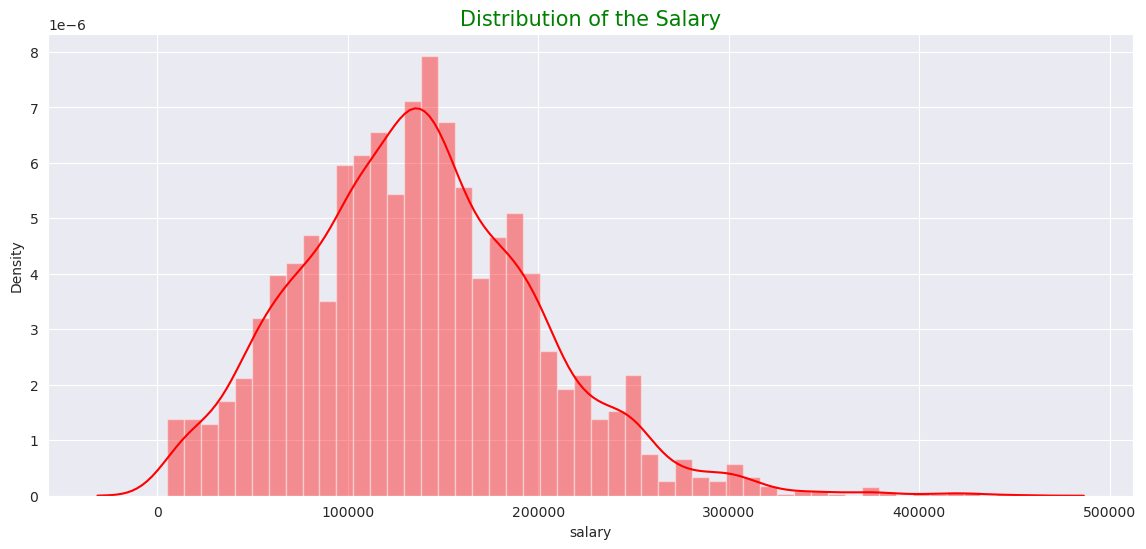

In [19]:
plt.figure(figsize=(14,6))
sns.set_palette('winter')
sns.set_style('darkgrid')
ax = sns.distplot(df['salary'],bins=50,hist=True,rug=False,color='r')
ax.set_title('Distribution of the Salary',fontdict={'fontsize':15},color='g')
plt.show()

#### Observation:-1
The distribution of the salary is kind of normal but skewed towards right. Plot shows that high distribution is between $1LPA  to $2LPA approx

#### Mean salary distribution across Experience Levels

In [20]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

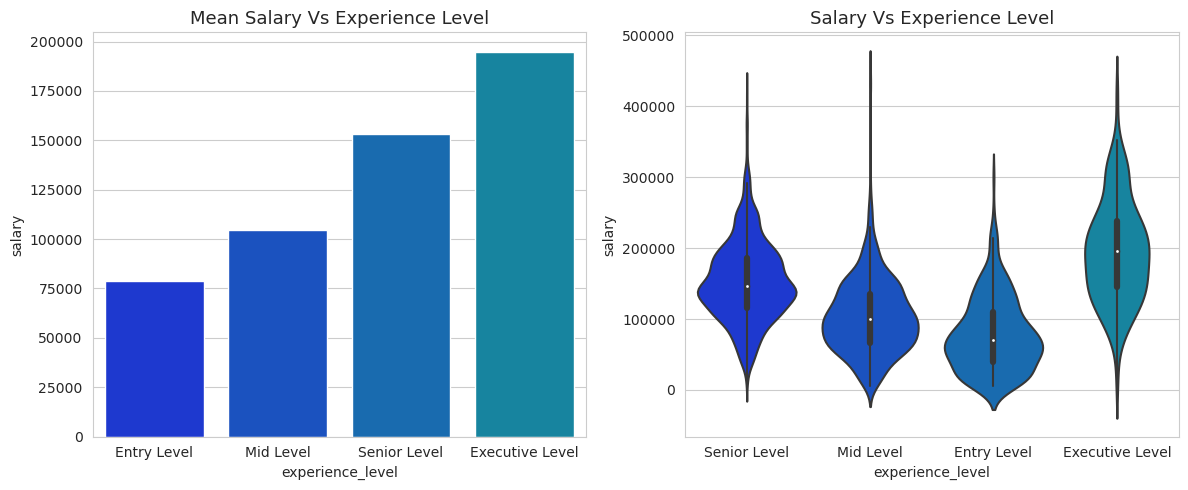

In [21]:
exp_lvl = df.groupby('experience_level').mean()['salary'].sort_values()
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax = sns.barplot(x=exp_lvl.index,y=exp_lvl)
ax.set_title('Mean Salary Vs Experience Level',fontdict={'fontsize':13})

plt.subplot(1,2,2)
ax = sns.violinplot(data=df,x='experience_level',y='salary')
ax.set_title('Salary Vs Experience Level',fontdict={'fontsize':13})
plt.tight_layout()



#### Observation:-2
##### The plots above sohws the same as expected. As experience grows, salary of individuals increases and vice versa

### Salary and Mean salary distribution across employment type

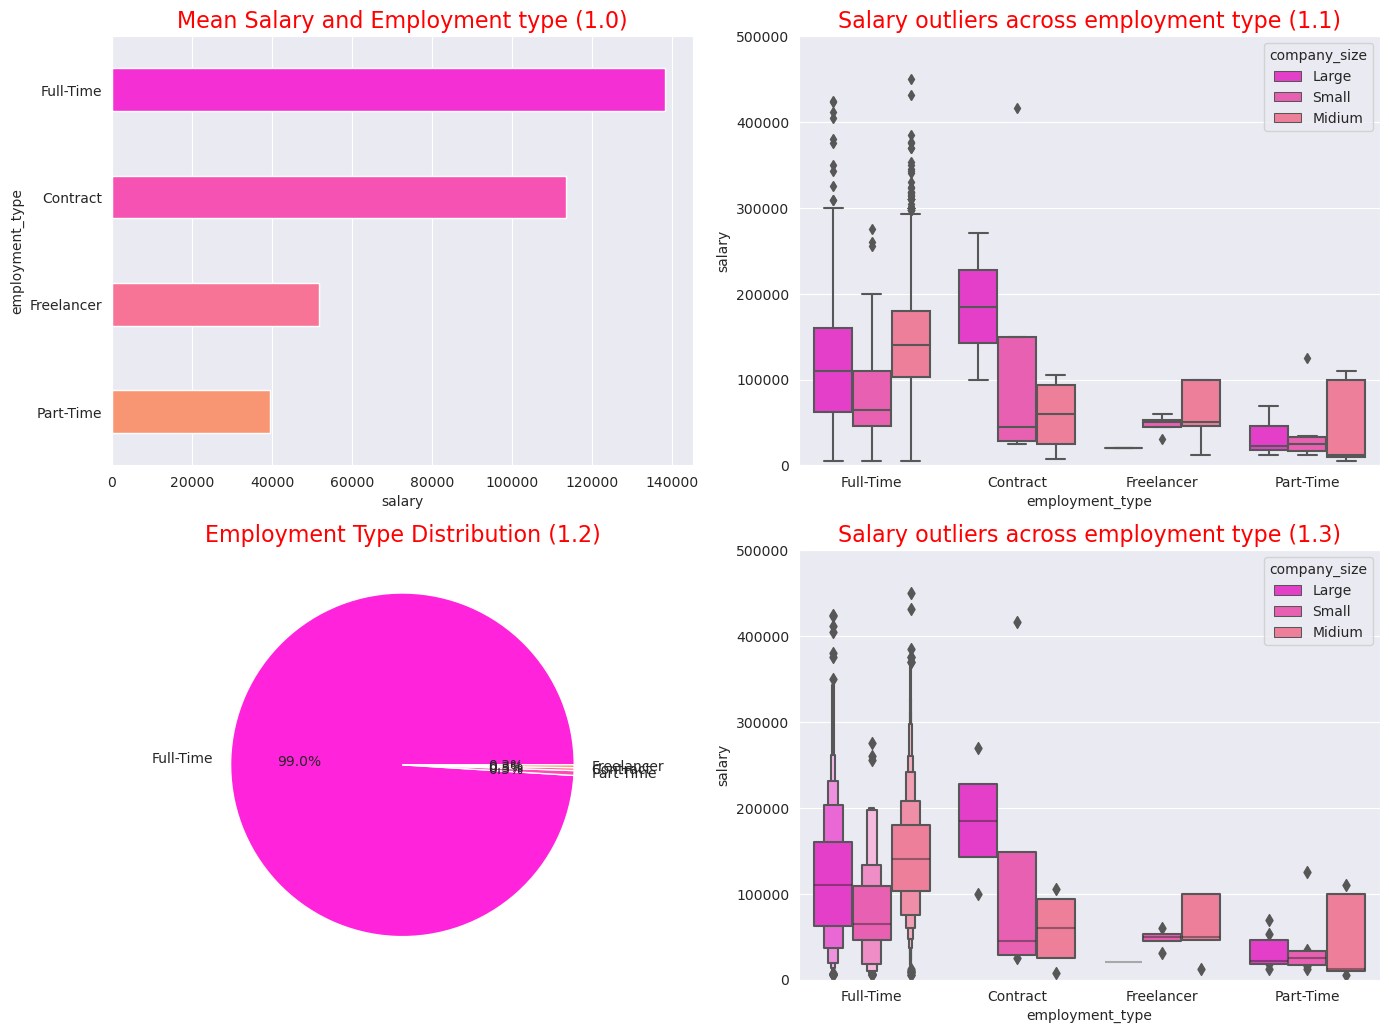

In [22]:
mean_empt_sd = df.groupby('employment_type').mean()['salary'].sort_values(ascending=False)
sns.set_style('darkgrid')
plt.figure(figsize=(14,10))
sns.set_palette('spring',color_codes=True)
plt.subplot(2,2,1)
ax=sns.barplot(x=mean_empt_sd,y=mean_empt_sd.index,width=0.4,saturation=0.9)
ax.set_title("Mean Salary and Employment type (1.0)",fontdict={'fontsize':16,
                                                        'color':'r'})




plt.subplot(2,2,2)
sns.boxplot(data=df,x='employment_type',y='salary',hue='company_size')
plt.title('Salary outliers across employment type (1.1)',fontdict={'fontsize':16,
                                                        'color':'r'})
plt.ylim(0,500000)


plt.subplot(2,2,3)
p_d = df['employment_type'].value_counts()
plt.pie(p_d,labels=p_d.index,autopct='%1.1f%%')
plt.title('Employment Type Distribution (1.2)',fontdict={'fontsize':16,
                                                        'color':'r'})
#plt.ylim(0,500000)
plt.tight_layout()


sns.set_style('darkgrid')
plt.subplot(2,2,4)

sns.boxenplot(data=df,x='employment_type',y='salary',hue='company_size')
plt.title('Salary outliers across employment type (1.3)',fontdict={'fontsize':16,
                                                        'color':'r'})
plt.ylim(0,500000)
plt.show()


#### Observation:-3
###### The plot (1.0) shows us that we have the highest mean salary for Full-time Data science professional but this could also be misleading since by looking at the plot (1.2) we observed imbalanced dataset. 99% of the observations has been recorded from the full-Time professionals while only 1% includes Part-Time,Freelance and Contact professionals. Same observation allpys on plot (1.0 and 1.3) resulting which it shows high number of outliers in the full-time roles. We also observed that medium and large scale companies offers more payout than the small scale companies




### Fetching the outliers in all the Job title fields

In [23]:
df['data'] = df['job_title'].str.split(" ")

In [24]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size,data
0,2023,Senior Level,Full-Time,Principal Data Scientist,85847,Spain,On-Site,Spain,Large,"[Principal, Data, Scientist]"
1,2023,Mid Level,Contract,ML Engineer,30000,United States,On-Site,United States,Small,"[ML, Engineer]"
2,2023,Mid Level,Contract,ML Engineer,25500,United States,On-Site,United States,Small,"[ML, Engineer]"
3,2023,Senior Level,Full-Time,Data Scientist,175000,Canada,On-Site,Canada,Midium,"[Data, Scientist]"
4,2023,Senior Level,Full-Time,Data Scientist,120000,Canada,On-Site,Canada,Midium,"[Data, Scientist]"


In [25]:
# More data transformation to address this problem

In [26]:
df['data1'] = [i[::-1][:1] for i in df['data']]


In [27]:
a = df['data1'].value_counts()

In [28]:
pd.Series(a)

[Engineer]      1640
[Scientist]     1063
[Analyst]        684
[Manager]        112
[Architect]      105
[Developer]       42
[Consultant]      26
[Science]         20
[Specialist]      17
[Lead]            15
[Researcher]      11
[Data]            10
[Technician]       2
[Programmer]       2
[Strategist]       2
[Modeler]          2
[Management]       1
[Learning]         1
Name: data1, dtype: int64

In [29]:
df['Work_field']=df['data1'].str[0]

In [30]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size,data,data1,Work_field
0,2023,Senior Level,Full-Time,Principal Data Scientist,85847,Spain,On-Site,Spain,Large,"[Principal, Data, Scientist]",[Scientist],Scientist
1,2023,Mid Level,Contract,ML Engineer,30000,United States,On-Site,United States,Small,"[ML, Engineer]",[Engineer],Engineer
2,2023,Mid Level,Contract,ML Engineer,25500,United States,On-Site,United States,Small,"[ML, Engineer]",[Engineer],Engineer
3,2023,Senior Level,Full-Time,Data Scientist,175000,Canada,On-Site,Canada,Midium,"[Data, Scientist]",[Scientist],Scientist
4,2023,Senior Level,Full-Time,Data Scientist,120000,Canada,On-Site,Canada,Midium,"[Data, Scientist]",[Scientist],Scientist


In [31]:
df.drop(columns=['data','data1'],inplace=True)

In [32]:
df[df['Work_field'] == 'Science']

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size,Work_field
478,2023,Executive Level,Full-Time,Director of Data Science,353200,United States,Remote,United States,Midium,Science
479,2023,Executive Level,Full-Time,Director of Data Science,249300,United States,Remote,United States,Midium,Science
1034,2023,Executive Level,Full-Time,Head of Data Science,160288,United Kingdom,Remote,United Kingdom,Midium,Science
1035,2023,Executive Level,Full-Time,Head of Data Science,127467,United Kingdom,Remote,United Kingdom,Midium,Science
1339,2023,Senior Level,Full-Time,Director of Data Science,125686,Canada,Hybrid,Canada,Midium,Science
1396,2023,Executive Level,Full-Time,Head of Data Science,314100,United States,Remote,United States,Midium,Science
1397,2023,Executive Level,Full-Time,Head of Data Science,195800,United States,Remote,United States,Midium,Science
1462,2023,Mid Level,Full-Time,Head of Data Science,60795,India,Hybrid,India,Large,Science
2849,2022,Senior Level,Full-Time,Director of Data Science,57786,France,Hybrid,France,Large,Science
3310,2022,Executive Level,Full-Time,Head of Data Science,224000,United States,On-Site,United States,Midium,Science


In [33]:
df['Work_field'].value_counts()

Engineer      1640
Scientist     1063
Analyst        684
Manager        112
Architect      105
Developer       42
Consultant      26
Science         20
Specialist      17
Lead            15
Researcher      11
Data            10
Technician       2
Programmer       2
Strategist       2
Modeler          2
Management       1
Learning         1
Name: Work_field, dtype: int64

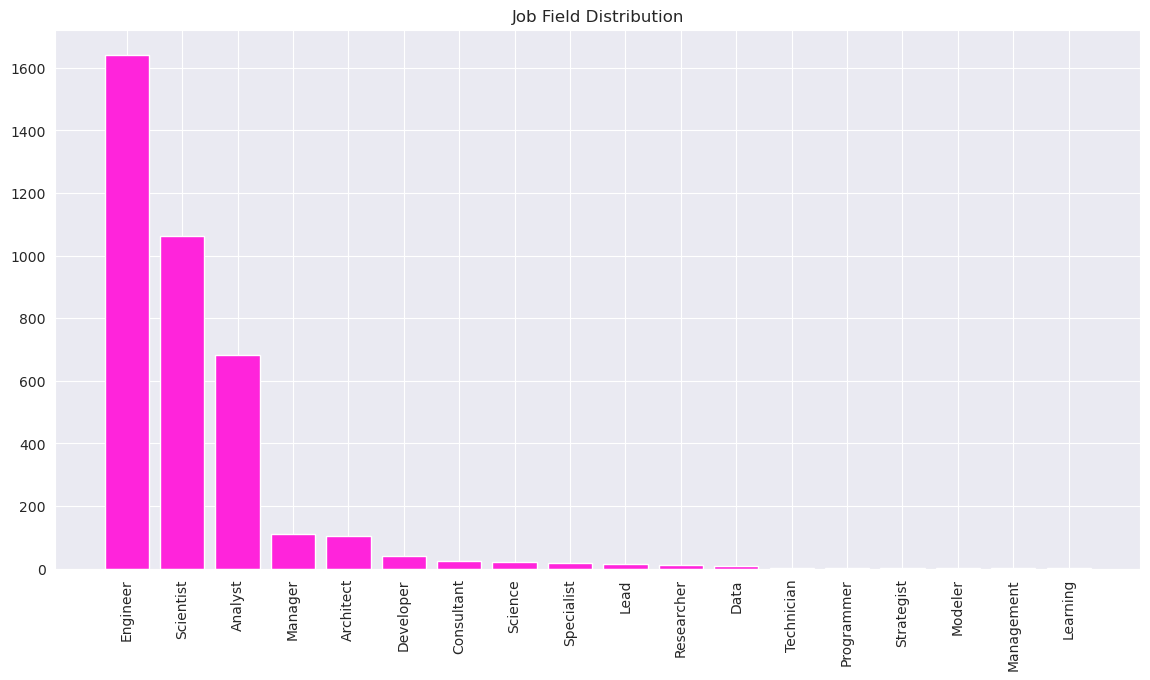

In [34]:
plt.figure(figsize=(14,7))

plt.bar(x=df['Work_field'].value_counts().index,
       height=df['Work_field'].value_counts().values)
plt.title('Job Field Distribution')
plt.xticks(rotation=90)
plt.show()


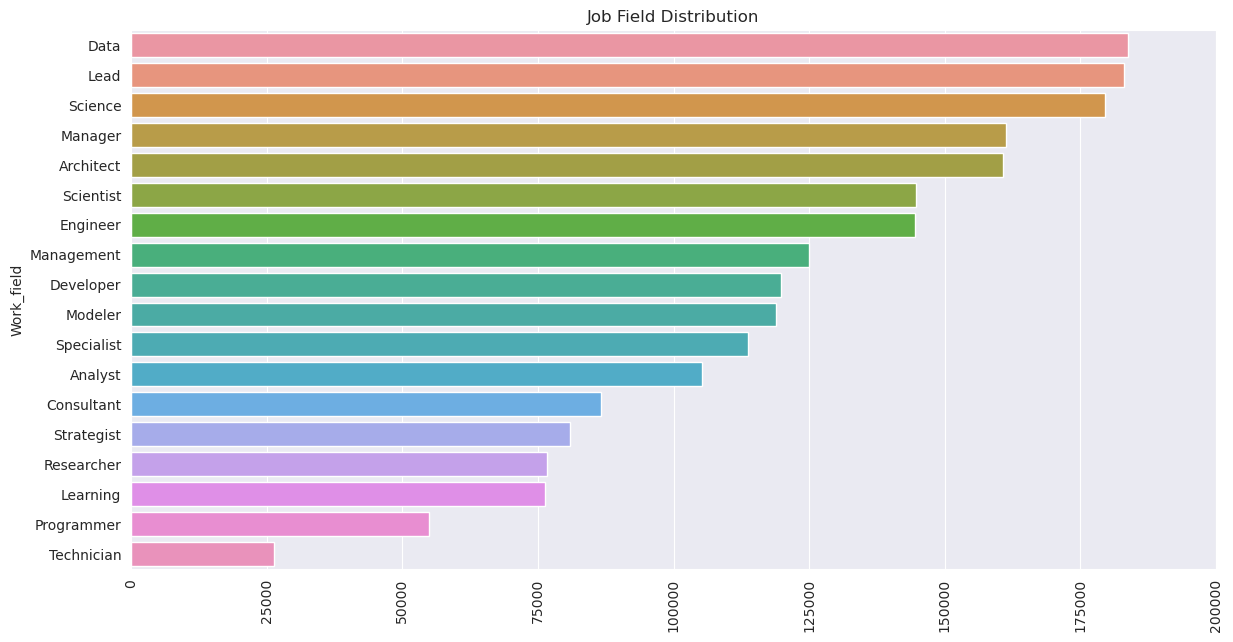

In [35]:
plt.figure(figsize=(14,7))
sns.barplot(x=df.groupby('Work_field').mean().sort_values(by='salary',ascending=False)['salary'].values,
            y=df.groupby('Work_field').mean().sort_values(by='salary',ascending=False)['salary'].index)
plt.title('Job Field Distribution')
plt.xticks(rotation=90)
plt.xlim(0,200000)
plt.show()





#df.groupby('Work_field').sum().sort_values(by='salary',ascending=False)['salary']

#### Observation:-4
###### Data shows that we have highest number of Data Science professionals in Engineering field followed by Scientits and Analysts.

###### Whereas, highest mean salaries has been reserved by X-Suite executive.

## Salary distribution in different Company sizes 


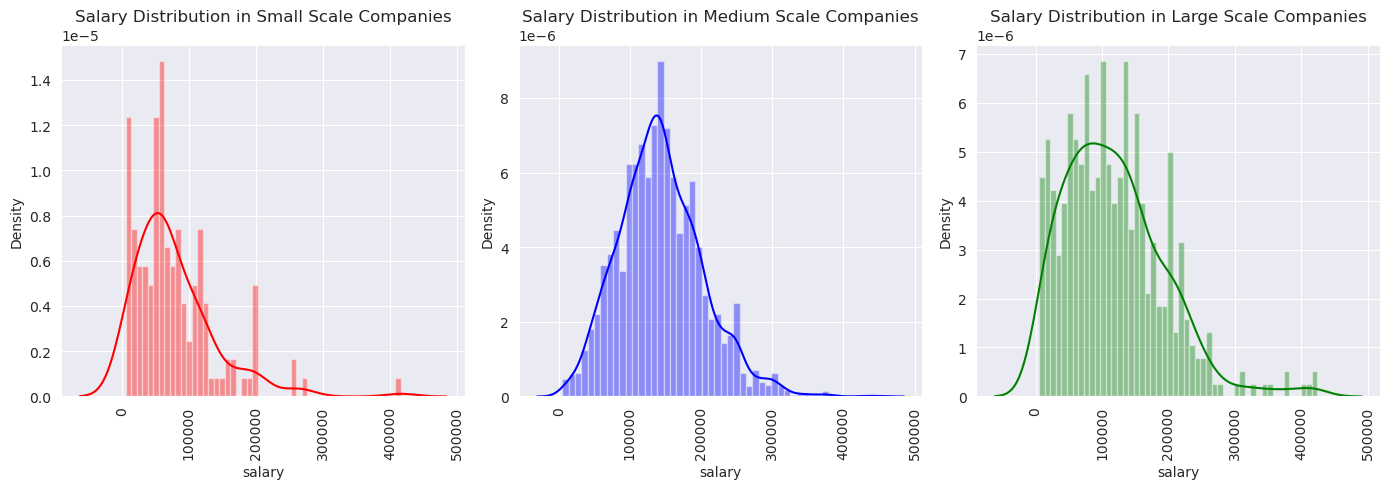

In [85]:

df[df['company_size'] == 'Small']

plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.distplot(df[df['company_size'] == 'Small']['salary'],bins=50,color='r')
plt.xticks(rotation=90)
plt.title('Salary Distribution in Small Scale Companies')


plt.subplot(1,3,2)
sns.distplot(df[df['company_size'] == 'Midium']['salary'],bins=50,color='b')
plt.xticks(rotation=90)
plt.title('Salary Distribution in Medium Scale Companies')

plt.subplot(1,3,3)
sns.distplot(df[df['company_size'] == 'Large']['salary'],bins=50,color='g')
plt.xticks(rotation=90)
plt.title('Salary Distribution in Large Scale Companies')
plt.tight_layout()
plt.show()

#### Observation:-5
###### Above plots shows us that we have the small scale salary distribution for small scale companies which roughly span from 10k to 80k per annum. We can see a perfect normal distribution of the salaries in Medium scale companies which roughly span from 1LPA to 2LPA. We have the high despersion in the Large scale companies. Which roughly span from 10K to 1.8 LPA


### Salary outliers in different compny sizes

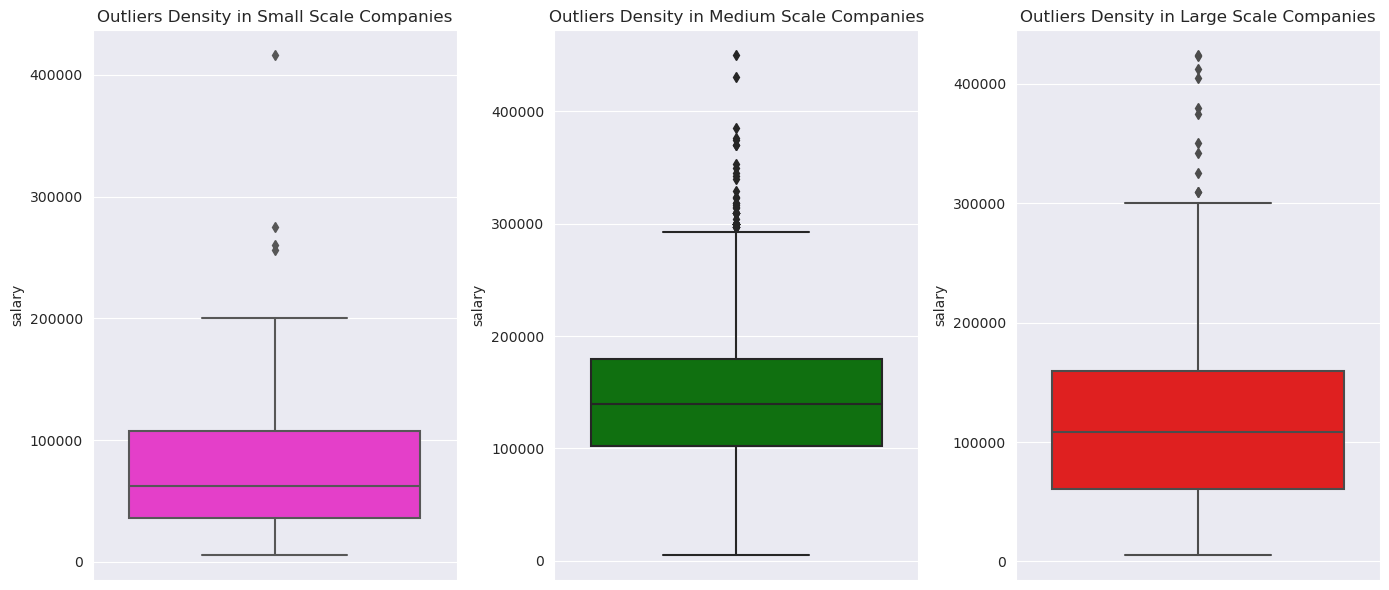

In [103]:

df[df['company_size'] == 'Small']

plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
sns.boxplot(y=df[df['company_size'] == 'Small']['salary'])
plt.xticks(rotation=90)
plt.title('Outliers Density in Small Scale Companies')


plt.subplot(1,3,2)
sns.boxplot(y=df[df['company_size'] == 'Midium']['salary'],color='g')
plt.xticks(rotation=90)
plt.title('Outliers Density in Medium Scale Companies')

plt.subplot(1,3,3)
sns.boxplot(y=df[df['company_size'] == 'Large']['salary'],color='r')
plt.xticks(rotation=90)
plt.title('Outliers Density in Large Scale Companies')
plt.tight_layout()
plt.show()



#### Observation:-6
###### Highest number of outliers are in the Medium scale companies with highest mean salary followed by Large scale and Small scale companies

### Distribution of job Type and Experience Level

In [105]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size,Work_field
0,2023,Senior Level,Full-Time,Principal Data Scientist,85847,Spain,On-Site,Spain,Large,Scientist
1,2023,Mid Level,Contract,ML Engineer,30000,United States,On-Site,United States,Small,Engineer


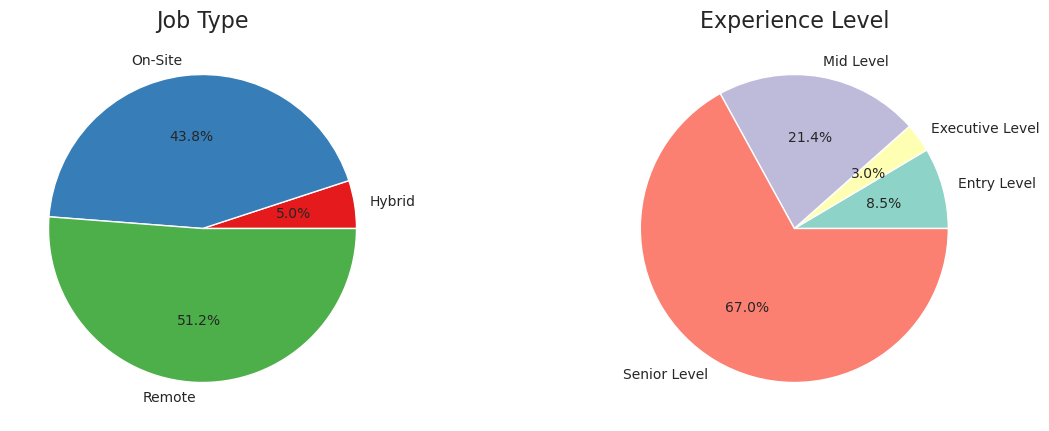

In [153]:
plt.figure(figsize=(14,5))
sns.set_palette('Set1')
plt.subplot(1,2,1)
plt.pie(df.groupby('remote_ratio').count()['salary'],autopct='%1.1f%%',
       
       labels=df.groupby('remote_ratio').count()['salary'].index)
plt.title('Job Type',fontdict={'fontsize': 16})
sns.set_palette('Set3')

plt.subplot(1,2,2)
plt.pie(df.groupby('experience_level').count()['salary'],autopct='%1.1f%%',
       
       labels=df.groupby('experience_level').count()['salary'].index)
plt.title('Experience Level',fontdict={'fontsize': 16})
plt.show()

## Salary distribution of job Type

In [163]:
df.groupby('remote_ratio').mean()

,work_year,salary
remote_ratio,,
Hybrid,2021.534392,78400.687831
On-Site,2022.240414,136481.452830
Remote,2022.569943,144316.202288


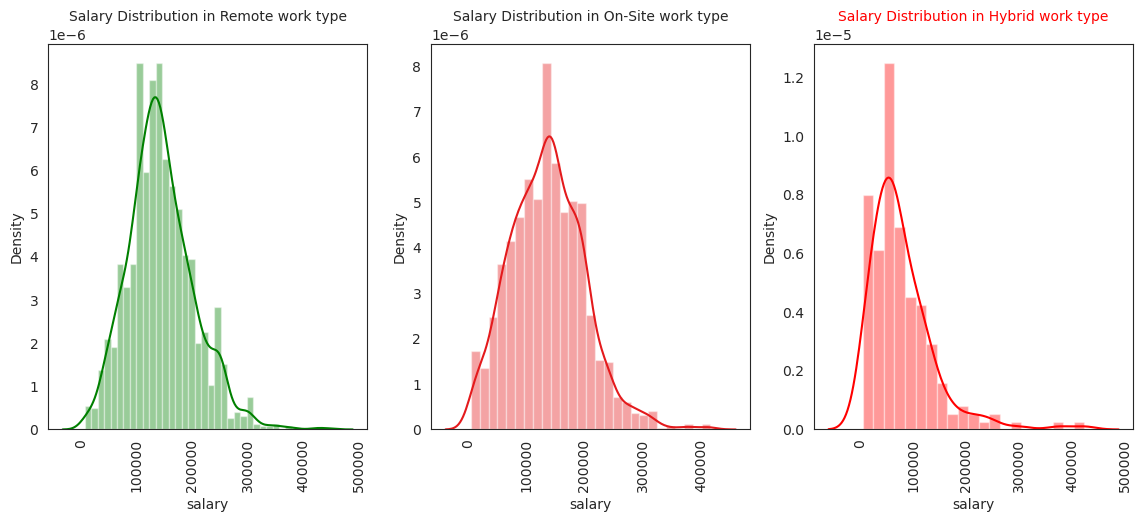

In [181]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.set_palette('Set1')
sns.set_style('white')
sns.distplot(df[df['remote_ratio'] == 'Remote']['salary'],color='g')
plt.xticks(rotation=90)
plt.title('Salary Distribution in Remote work type',fontdict={'fontsize':10})

plt.subplot(1,3,2)
sns.set_palette('Set2')
sns.distplot(df[df['remote_ratio'] == 'On-Site']['salary'])
plt.xticks(rotation=90)
plt.title('Salary Distribution in On-Site work type',fontdict={'fontsize':10})


plt.subplot(1,3,3)
sns.set_style('white')
sns.set_palette('Set3')
sns.distplot(df[df['remote_ratio'] == 'Hybrid']['salary'],color='r')
plt.xticks(rotation=90)
plt.title('Salary Distribution in Hybrid work type',fontdict={'fontsize':10},color='r')
plt.show()

## Mean Salary Vs Job type
## Salary distribution of Job type and Company size
## Sum of salaries in the job types(violin)

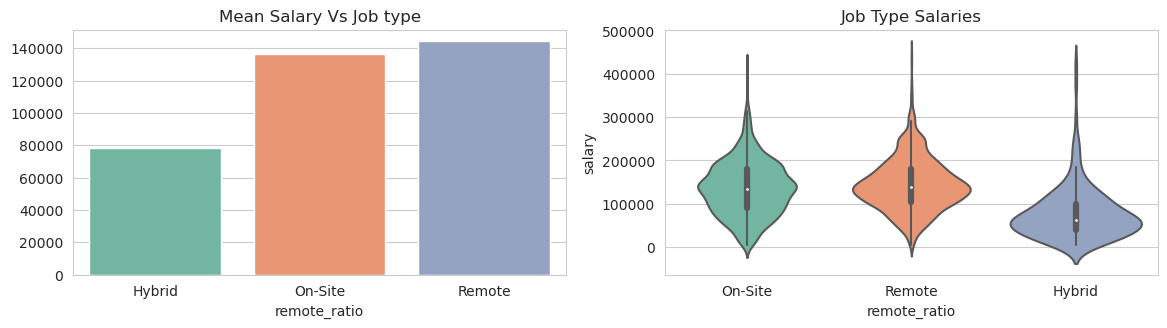

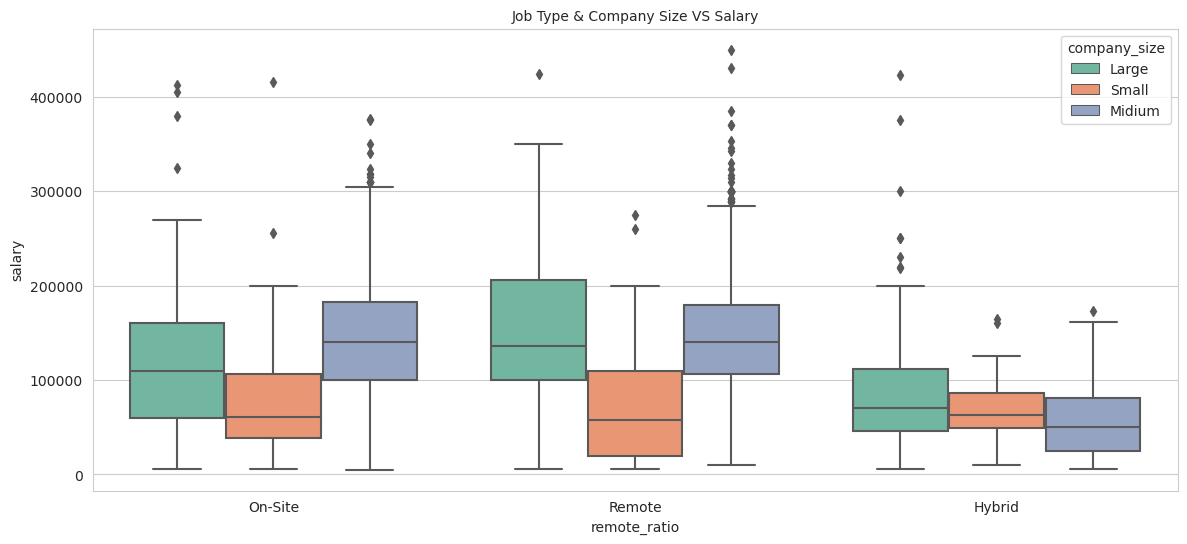

In [224]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.set_palette('Set2')
sns.set_style('whitegrid')
ax = sns.barplot(x=df.groupby('remote_ratio').mean()['salary'].index,
           y=df.groupby('remote_ratio').mean()['salary'].values)
ax.set_title('Mean Salary Vs Job type')


plt.subplot(2,2,2)
sns.set_palette('Set2')
sns.set_style('whitegrid')


sns.violinplot(data=df,x='remote_ratio',y='salary')
plt.title('Job Type Salaries')
plt.show()

plt.figure(figsize=(14,6))
ax = sns.boxplot(data=df, x='remote_ratio', y='salary', hue='company_size')
ax.set_title('Job Type & Company Size VS Salary', fontdict={'fontsize': 10})
plt.show()

In [184]:
df['remote_ratio'].value_counts()

Remote     1923
On-Site    1643
Hybrid      189
Name: remote_ratio, dtype: int64

In [199]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size,Work_field
0,2023,Senior Level,Full-Time,Principal Data Scientist,85847,Spain,On-Site,Spain,Large,Scientist
1,2023,Mid Level,Contract,ML Engineer,30000,United States,On-Site,United States,Small,Engineer
2,2023,Mid Level,Contract,ML Engineer,25500,United States,On-Site,United States,Small,Engineer
3,2023,Senior Level,Full-Time,Data Scientist,175000,Canada,On-Site,Canada,Midium,Scientist
4,2023,Senior Level,Full-Time,Data Scientist,120000,Canada,On-Site,Canada,Midium,Scientist


#### Top 10 data science roles according to the mean salary
#### Top 10 data science roles with highest opening
#### Top 10 countries according to the mean salary
#### Top 10 countries having most Data science opportunities
#### Top 10 employee residence according to the mean salaries 
#### Top 10 countris having most data scientists

In [225]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size,Work_field
0,2023,Senior Level,Full-Time,Principal Data Scientist,85847,Spain,On-Site,Spain,Large,Scientist
1,2023,Mid Level,Contract,ML Engineer,30000,United States,On-Site,United States,Small,Engineer
2,2023,Mid Level,Contract,ML Engineer,25500,United States,On-Site,United States,Small,Engineer
3,2023,Senior Level,Full-Time,Data Scientist,175000,Canada,On-Site,Canada,Midium,Scientist
4,2023,Senior Level,Full-Time,Data Scientist,120000,Canada,On-Site,Canada,Midium,Scientist


In [283]:
All1 = df.groupby('job_title')['salary'].mean().sort_values(ascending=False)
ds_val =  pd.Series(data=list(All1.index)).apply(lambda x: x if list(df['job_title']).count(x) > 1 else 0)
unique = ds_val[ds_val != 0][:10]
dist = All1[unique]
dist

job_title
Data Lead                             212500.000000
Data Analytics Lead                   211254.500000
Principal Data Scientist              198171.125000
Director of Data Science              195140.727273
Principal Data Engineer               192500.000000
Machine Learning Software Engineer    192420.000000
Data Science Manager                  191278.775862
Applied Scientist                     190264.482759
Head of Data                          183857.500000
Data Infrastructure Engineer          175051.666667
Name: salary, dtype: float64

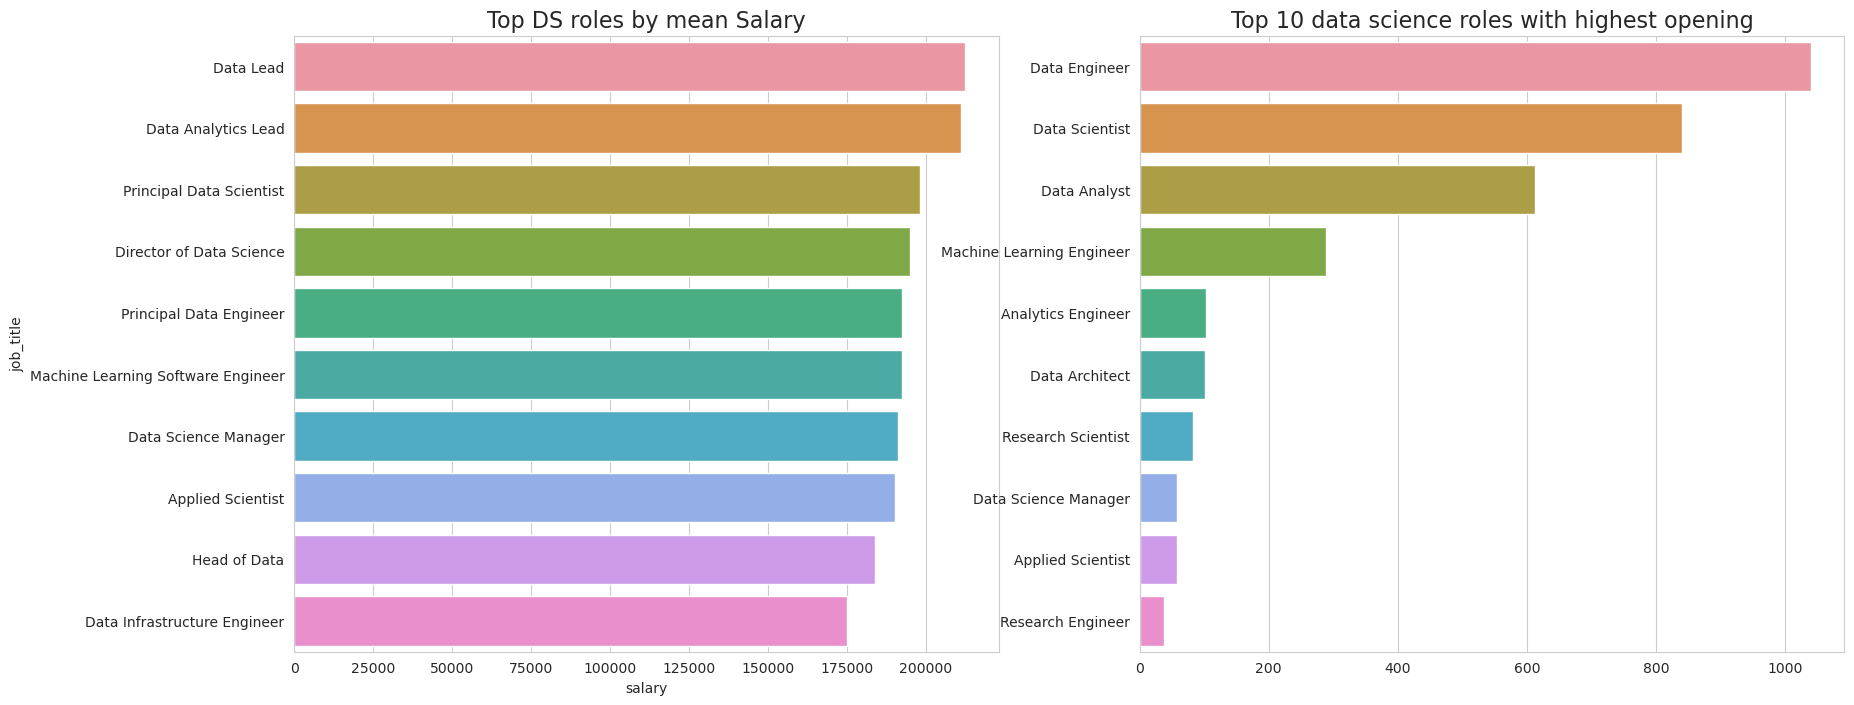

In [399]:
#  Top 10 data science roles according to the mean salary

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax = sns.barplot(y=dist.index, x=dist)
ax.set_title('Top DS roles by mean Salary',fontdict={'fontsize':16})

#### Top 10 data science roles with highest opening
plt.subplot(1,2,2)
ax = sns.barplot(y=df['job_title'].value_counts()[:10].index,
                x=df['job_title'].value_counts()[:10].values)
ax.set_title('Top 10 data science roles with highest opening',fontdict={'fontsize':16})


plt.show()

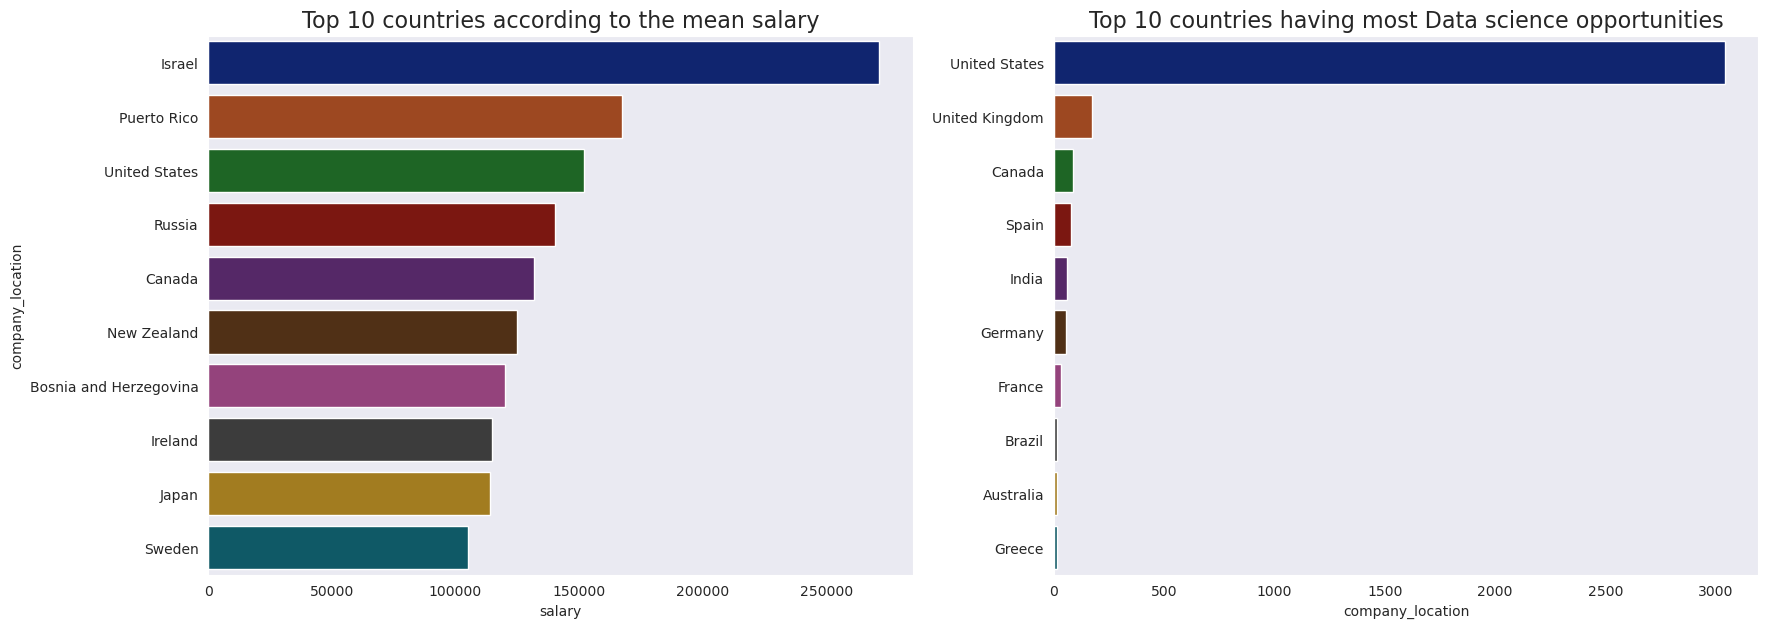

In [404]:
#Top 10 countries according to the mean salary
plt.figure(figsize=(20,7))
sns.set_style('dark')
sns.set_palette('dark')
plt.subplot(1,2,1)
sns.barplot(x=df.groupby('company_location').mean()['salary'].sort_values(ascending=False)[:10],
            y=df.groupby('company_location').mean()['salary'].sort_values(ascending=False)[:10].index)
plt.title('Top 10 countries according to the mean salary',fontdict={'fontsize':16})

#### Top 10 countries having most Data science opportunities
plt.subplot(1,2,2)
sns.barplot(x=df['company_location'].value_counts()[:10],
            y=df['company_location'].value_counts()[:10].index)
plt.title('Top 10 countries having most Data science opportunities',fontdict={'fontsize':16})
plt.show()

In [405]:
#### Top 10 employee residence according to the mean salaries 
#### Top 10 countris having most data scientists

In [435]:
#### Top 10 employee residence according to the mean salaries 
C=df.groupby('employee_residence').mean()['salary'].sort_values(ascending=False)[:10]
